# INSTRUÇÃO PRÁTICA 009
## Revisao e consolidaçao do conteúdo de __Pandas__ avançado.

Revisar e consolidar o conteúdo de __Pandas__ e visualização de dados avançado.

### Gerando um DataFrame usando faker

Foi feito um DataFrame com 1000 linhas  usando a biblioteca `faker` para gerar dados fictícios. Nele os dados contidos são:

- CPF;
- Nme;
- Idade (entre 18 e 28);
- Sexo;
- Endereço de email;
- Nota no ENEM (entre 640 e 800)
- Abandono (True o False)
- Qual semestre (entre 1 e 8, se Abandono for True)
- CRA após o segundo semestre (float entre 5 e 10)
- CRA após o quarto semestre (float entre 5 e 10)
- CRA após o Sexto semestre (float entre 5 e 10)



In [1]:
import gerar_alunos_pd as ga

data_frame = ga.gerar_dataframe()

data_frame.head()

,CPF,Nome,Sexo,Idade,Endereço,Nota do ENEM,Abandono,Semestre de desistência,CRA até 2º semestre,CRA até 4º semestre,CRA até 6º semestre
0,553.441.691-54,Dr. Luiz Gustavo Rezende,M,25,"Pátio de Aragão, 9 Vila Nova Paraíso 60162999 ...",705,False,NaN,6.88,6.96,5.65
1,227.437.765-62,Lucas Ramos,F,23,"Parque Daniel Silva, 59 Estoril 46219-577 da C...",655,False,NaN,8.82,5.19,8.15
2,774.387.873-53,Srta. Fernanda Teixeira,F,22,"Vila de Oliveira, 49 Frei Leopoldo 32767759 Te...",640,False,NaN,5.08,9.44,8.98
3,567.443.989-17,Erick Cardoso,M,22,"Pátio de Cardoso, 44 Mangueiras 10058768 Cunha...",708,True,8.0,7.24,5.84,5.25
4,140.206.866-53,Ana Sophia Teixeira,F,18,"Setor Costa, 46 Marmiteiros 50437240 Jesus / AL",782,True,4.0,9.89,NaN,NaN


### Analizanndo outro DataFrame

Carreguando dados gerados que estão em um arquivo ``csv``. 

In [2]:
import pandas as pd

# carregando o arquivo
alunos = pd.read_csv('../dev-JoaoManoel/alunos.csv')

alunos.head()

,cpf,nome,idade,sexo,email,notaEnem,craP2,craP4,craP6,abandono,semestreAbandono
0,749.038.261-04,Letícia Farias,27,F,nda-costa@example.org,697,NaN,NaN,NaN,False,NaN
1,149.852.306-42,Bianca Freitas,27,F,mgoncalves@example.com,708,NaN,NaN,NaN,False,NaN
2,563.970.184-66,Leonardo Peixoto,22,M,maria-ceciliadas-neves@example.net,699,7.0,7.0,8.0,True,8.0
3,726.851.403-44,Natália Araújo,21,F,nalves@example.com,750,8.0,NaN,NaN,True,4.0
4,912.576.043-25,Ana da Rosa,25,F,rcavalcanti@example.com,740,NaN,NaN,NaN,True,2.0


1. Identifique qual q relação de alunos de sexo masculino e feminino no conjunto.

In [3]:
mask_m = alunos['sexo'] == 'M'

qntd_masc =  mask_m.sum()
total = alunos['sexo'].count()
qntd_fem = (total - qntd_masc).sum()

print(f"Porcentagem de alunos do sexo masculino: {qntd_masc*100/total}% ({qntd_masc})")
print(f"Porcentagem de alunos do sexo feminino: {qntd_fem*100/total}% ({qntd_fem})")
print(f"Quantidade total de alunos: {qntd_masc + qntd_fem}")

qntd_masc

Porcentagem de alunos do sexo masculino: 48.9% (489)
Porcentagem de alunos do sexo feminino: 51.1% (511)
Quantidade total de alunos: 1000


489

2. Dado que os alunos tem idade entre 18 e 28 anos, mostre qual a média da nota do ENEM dos alunos agrupados por idade.

In [4]:
idade_agrupado = alunos.groupby('idade')[['notaEnem']].mean()
idade_agrupado.columns = ['Media de nota no Enem']
idade_agrupado

,Media de nota no Enem
idade,
18,721.200000
19,714.088889
20,713.361702
21,724.773196
22,718.431193
23,723.270833
24,720.222222
25,724.495798
26,716.348315


3. Normalize as notas do ENEM de todos os alunos para um valor entre 5 e 10.

In [5]:
min_nota = alunos['notaEnem'].min()
max_nota = alunos['notaEnem'].max()

alunos['notaEnem'] = ((alunos['notaEnem'] - min_nota)/(max_nota - min_nota))*5 +5
alunos.head()

,cpf,nome,idade,sexo,email,notaEnem,craP2,craP4,craP6,abandono,semestreAbandono
0,749.038.261-04,Letícia Farias,27,F,nda-costa@example.org,6.792453,NaN,NaN,NaN,False,NaN
1,149.852.306-42,Bianca Freitas,27,F,mgoncalves@example.com,7.138365,NaN,NaN,NaN,False,NaN
2,563.970.184-66,Leonardo Peixoto,22,M,maria-ceciliadas-neves@example.net,6.855346,7.0,7.0,8.0,True,8.0
3,726.851.403-44,Natália Araújo,21,F,nalves@example.com,8.459119,8.0,NaN,NaN,True,4.0
4,912.576.043-25,Ana da Rosa,25,F,rcavalcanti@example.com,8.144654,NaN,NaN,NaN,True,2.0


4. Faça um gráfico de evolução das notas, desde o ENEM até CRA do sexto semestre para os 10 alunos com melhor CRA no sexto semestre. Utilize a nota do ENEM normalizada. coloque no gráfico círculos se o aluno for de sexo feminino e quadrados se for masculino. 

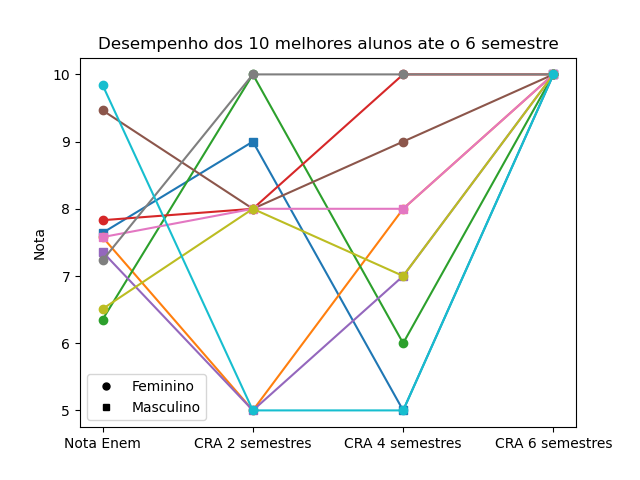

In [6]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
import matplotlib.lines as mlines

%matplotlib widget

n_melhores = 10
melhores = alunos.nlargest(n_melhores, 'craP6')

for i in range(n_melhores):
    valores = [melhores.iloc[i]['notaEnem'], melhores.iloc[i]['craP2'], melhores.iloc[i]['craP4'],  melhores.iloc[i]['craP6']]
    
    # simbolo para o sexo
    if melhores.iloc[i]['sexo'] == 'M':
        marcador = 's'
        legenda = 'Masculino'
    else:
        marcador = 'o'
        legenda = 'Feminino'
    plt.plot(['Nota Enem', "CRA 2 semestres", "CRA 4 semestres", 'CRA 6 semestres'], valores, marker = marcador, label = legenda)



circulo_fem = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=5, label='Feminino')
quad_masc = mlines.Line2D([], [], color='black', marker='s', linestyle='None', markersize=5, label='Masculino')


plt.title('Desempenho dos 10 melhores alunos ate o 6 semestre')
plt.ylabel('Nota')
plt.legend(handles=[circulo_fem, quad_masc])
plt.show()
